[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mouryarahul/7CS107_PracticalWorks_Assignment/blob/master/Week3_Assignment.ipynb)


# 7CS107 – Advanced AI & ML  
## Week 3 Programming Assignment (100 marks)

**Topic coverage:** Gradients & Hessians, convexity, Gradient Descent, Newton's Method, conditional probability, entropy, and mutual information.  
**Input domain:** Primarily scalar-valued functions with **2D inputs**.  
**What to submit:** Upload this completed notebook (with your code and outputs) to the VLE.

> **Rules:**  
> - You may use only **NumPy** and **Matplotlib**. Do **not** use SymPy, autograd, JAX, PyTorch, TensorFlow, scikit-learn, or other libraries that compute derivatives or information-theoretic quantities for you.  
> - Write clean, vectorised code where possible.  
> - Show intermediate outputs where asked.  
> - Keep random seeds fixed where provided for reproducibility.

**Marking breakdown:** Q1 (15), Q2 (15), Q3 (20), Q4 (15), Q5 (10), Q6 (12), Q7 (13) = **100 marks**.

---



## Q1. Gradient and Hessian of a scalar-valued function (15 marks)

Consider the scalar-valued function $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ defined by
$f(x, y) = (x + 2y^3)^2 + 0.5x^2 + 3y^2$.

1. (8 marks) Implement two functions:
   - grad_f(xy) that returns the gradient $\begin{bmatrix}\dfrac{df}{dx}, \dfrac{df}{dy}\end{bmatrix}$.
   - hess_f(xy) that returns the Hessian
   $$\begin{bmatrix}
      & \dfrac{d^2f}{dx^2} & \dfrac{d^2f}{dxdy} \\
      & \dfrac{d^2f}{dydx} & \dfrac{d^f}{dy^2}
      \end{bmatrix}
   $$

   Do this by hand from first principles (use algebra and the chain/product rules). No symbolic/auto-diff.

2. (7 marks) Verify your implementations numerically by comparing to finite-difference approximations of the gradient and Hessian at the points (0,0), (1,-1), (0.5,0.5).  
   Report the max absolute error for each point (gradient and Hessian separately) using a small step (e.g., h=1e-5).


In [4]:

import numpy as np

def f(xy: np.ndarray) -> float:
    # Scalar function f(x, y) = (x + 2*y^3)^2 + 0.5*x^2 + 3*y^2
    x, y = float(xy[0]), float(xy[1])
    return (x + 2*(y**3))**2 + 0.5*(x**2) + 3*(y**2)

def grad_f(xy: np.ndarray) -> np.ndarray:
    # Return gradient vector [df/dx, df/dy].
    # ### BEGIN STUDENT CODE
    x, y = float(xy[0]), float(xy[1])
    # df/dx = 3x + 4 y^3
    dfdx = 3.0*x + 4.0*(y**3)
    # df/dy = 12 y^2 * (x + 2 y^3) + 6 y
    dfdy = 12.0*(y**2)*(x + 2.0*(y**3)) + 6.0*y
    return np.array([dfdx, dfdy])
    # raise NotImplementedError("Implement the analytical gradient here.")
    # ### END STUDENT CODE

def hess_f(xy: np.ndarray) -> np.ndarray:
    # Return Hessian matrix [[d2f/dx2, d2f/dxdy], [d2f/dydx, d2f/dy2]].
    # ### BEGIN STUDENT CODE
    x, y = float(xy[0]), float(xy[1])
    # d2f/dx2 = 3
    d2xx = 3.0
    # d2f/dxdy = 12 y^2
    d2xy = 12.0*(y**2)
    # d2f/dy2 = 24 x y + 120 y^4 + 6
    d2yy = 24.0*x*y + 120.0*(y**4) + 6.0
    return np.array([[d2xx, d2xy],
                     [d2xy, d2yy]])
    # raise NotImplementedError("Implement the analytical Hessian here.")
    # ### END STUDENT CODE

def fd_grad(xy: np.ndarray, h: float = 1e-5) -> np.ndarray:
    # Finite-difference gradient approximation (central difference)
    e1 = np.array([1.0, 0.0])
    e2 = np.array([0.0, 1.0])
    g1 = (f(xy + h*e1) - f(xy - h*e1)) / (2*h)
    g2 = (f(xy + h*e2) - f(xy - h*e2)) / (2*h)
    return np.array([g1, g2])

def fd_hess(xy: np.ndarray, h: float = 1e-4) -> np.ndarray:
    # Finite-difference Hessian approximation (central differences)
    e1 = np.array([1.0, 0.0])
    e2 = np.array([0.0, 1.0])
    f_xph = f(xy + h*e1); f_xmh = f(xy - h*e1)
    f_yph = f(xy + h*e2); f_ymh = f(xy - h*e2)
    f0 = f(xy)
    d2f_dx2 = (f_xph - 2*f0 + f_xmh) / (h**2)
    d2f_dy2 = (f_yph - 2*f0 + f_ymh) / (h**2)
    f_pp = f(xy + h*e1 + h*e2)
    f_pm = f(xy + h*e1 - h*e2)
    f_mp = f(xy - h*e1 + h*e2)
    f_mm = f(xy - h*e1 - h*e2)
    d2f_dxdy = (f_pp - f_pm - f_mp + f_mm) / (4*h**2)
    H = np.array([[d2f_dx2, d2f_dxdy],
                  [d2f_dxdy, d2f_dy2]])
    return H

# --- Tests ---
test_points = [np.array([0.0, 0.0]), np.array([1.0, -1.0]), np.array([0.5, 0.5])]
for p in test_points:
    try:
        g_true = grad_f(p)
        H_true = hess_f(p)
    except NotImplementedError:
        print("Implement grad_f and hess_f to run the tests.")
        break
    g_fd = fd_grad(p, h=1e-5)
    H_fd = fd_hess(p, h=1e-4)
    print(f"Point {p}:")
    print("  grad max|.| error:", np.max(np.abs(g_true - g_fd)))
    print("  Hess max|.| error:", np.max(np.abs(H_true - H_fd)))


Point [0. 0.]:
  grad max|.| error: 0.0
  Hess max|.| error: 4.0000000343623096e-08
Point [ 1. -1.]:
  grad max|.| error: 7.578620397907798e-09
  Hess max|.| error: 1.1564548003661912e-06
Point [0.5 0.5]:
  grad max|.| error: 1.200127996980882e-09
  Hess max|.| error: 3.0337406542457757e-07



## Q2. Checking convexity via the Hessian (15 marks)

A twice continuously differentiable function $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ is:
- Convex if its Hessian is positive semi-definite (PSD) everywhere.
- Strictly convex if the Hessian is positive definite (PD) everywhere.

1. (9 marks) For each function below, write a function that returns its Hessian, then
   check PD/PSD on a grid $\mathcal{G}=\{-2,-1,0,1,2\}^2$ by inspecting eigenvalues:
   - $f_1(x,y) = (x-1)^2 + 10(y-2)^2$  
   - $f_2(x,y) = x^4 - 3x^2y + y^4$

   Print, for each $f_i$, the minimum eigenvalue over $\mathcal{G}$ and your conclusion (convex / strictly convex / non-convex).

2. (6 marks) Briefly justify your conclusions in 3–5 lines based on the Hessian test.


In [3]:

import numpy as np

def hess_f1(xy: np.ndarray) -> np.ndarray:
    # Hessian of f1(x,y) = (x-1)^2 + 10*(y-2)^2
    # ### BEGIN STUDENT CODE
    return np.array([[2.0, 0.0], [0.0, 20.0]])
    # raise NotImplementedError("Implement Hessian for f1.")
    # ### END STUDENT CODE

def hess_f2(xy: np.ndarray) -> np.ndarray:
    # Hessian of f2(x,y) = x**4 - 3*x**2*y + y**4
    # ### BEGIN STUDENT CODE
    x, y = xy
    return np.array([[12*(x**2) - 6*y, -6*x],
                     [-6*x, 12*(y**2)]], dtype=float)
    # raise NotImplementedError("Implement Hessian for f2.")
    # ### END STUDENT CODE

def min_eig_over_grid(hess_fun, grid_vals=(-2, -1, 0, 1, 2)) -> float:
    mins = []
    for x in grid_vals:
        for y in grid_vals:
            H = hess_fun(np.array([x, y], dtype=float))
            lam_min = np.linalg.eigvalsh(H).min()
            mins.append(lam_min)
    return float(np.min(mins))

# --- Tests/Reports ---
try:
    m1 = min_eig_over_grid(hess_f1)
    print("f1: min eigenvalue over grid =", m1)
    # print("Conclusion: ...")
except NotImplementedError:
    print("Implement hess_f1 to evaluate f1.")

try:
    m2 = min_eig_over_grid(hess_f2)
    print("f2: min eigenvalue over grid =", m2)
    # print("Conclusion: ...")
except NotImplementedError:
    print("Implement hess_f2 to evaluate f2.")


f1: min eigenvalue over grid = 2.0
f2: min eigenvalue over grid = -12.0


**Your written justification (3–5 lines):**

For f1(x,y) = (x-1)^2 + 10(y-2)^2, the Hessian [[2,0],[0,20]] is constant and both eigenvalues (2,20) are positive, meaning curvature is positive in all directions, thus f1 is strictly convex.

For f2(x,y) = x^4 - 3*x^2*y + y^4, the Hessian is
H_f2(x, y) = [[12*x^2 - 6*y, -6*x], [-6*x, 12*y^2]]

When evaluated on the grid {-2, -1, 0, 1, 2}^2, the smallest eigenvalue found is -12 at point (0,2), indicating that the Hessian has both positive and negative curvature directions there. A negative eigenvalue means the surface bends downward in some direction, so the function is not convex.


## Q3. Implement Gradient Descent in 2D (20 marks)

We will minimise the convex quadratic
$g(x,y) = (x-1)^2 + 10(y-2)^2$.

1. (10 marks) Implement gradient_descent_2d(g, grad_g, x0, step, tol, max_iter) that returns the iterate history as an array of shape (T,2). Stop when $||\nabla g||_2 \leq $ tol or max_iter is reached.
2. (5 marks) Run with $x_0=[-2.0, -2.0]$, step=0.1, tol=1e-6, max_iter=500. Print: final point, final gradient norm, and number of iterations.
3. (5 marks) Make a single 2D contour plot of g with the optimisation trajectory overlaid (markers at iterates).


Final x: [0.99999954 2.        ]
Final grad norm: 9.126098605705124e-07
Iterations: 149


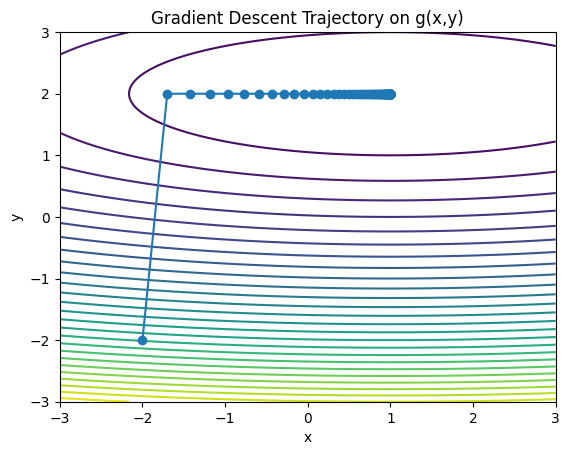

In [14]:

import numpy as np
import matplotlib.pyplot as plt

def g(xy: np.ndarray) -> float:
    x, y = float(xy[0]), float(xy[1])
    return (x-1.0)**2 + 10.0*(y-2.0)**2

def grad_g(xy: np.ndarray) -> np.ndarray:
    # Analytical gradient of g.
    # ### BEGIN STUDENT CODE
    x, y = float(xy[0]), float(xy[1])
    return np.array([2.0*(x - 1.0), 20.0*(y - 2.0)])
    # raise NotImplementedError("Implement grad_g.")
    # ### END STUDENT CODE

def gradient_descent_2d(fun, grad_fun, x0, step=0.1, tol=1e-6, max_iter=500):
    # Basic Gradient Descent for R^2 -> R objectives.
    # Returns: history array of shape (T, 2).
    # ### BEGIN STUDENT CODE
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    for k in range(1, max_iter + 1):
        grad = grad_fun(x)
        grad_norm = np.linalg.norm(grad)
        if grad_norm <= tol:
            break
        x = x - step * grad
        history.append(x.copy())
    return np.array(history)
    # raise NotImplementedError("Implement Gradient Descent.")
    # ### END STUDENT CODE

# --- Run & report ---
x0 = np.array([-2.0, -2.0], dtype=float)
try:
    hist = gradient_descent_2d(g, grad_g, x0, step=0.1, tol=1e-6, max_iter=500)
    x_final = hist[-1]
    print("Final x:", x_final)
    print("Final grad norm:", np.linalg.norm(grad_g(x_final)))
    print("Iterations:", len(hist)-1)

    # --- Plot (single plot only) ---
    xs = np.linspace(-3, 3, 200)
    ys = np.linspace(-3, 3, 200)
    XX, YY = np.meshgrid(xs, ys)
    ZZ = (XX-1.0)**2 + 10.0*(YY-2.0)**2
    plt.figure()
    plt.contour(XX, YY, ZZ, levels=30)
    plt.plot(hist[:,0], hist[:,1], marker='o')
    plt.title("Gradient Descent Trajectory on g(x,y)")
    plt.xlabel("x"); plt.ylabel("y")
    plt.show()
except NotImplementedError:
    print("Implement grad_g and gradient_descent_2d to run this cell.")



## Q4. Implement Newton's Method in 2D (15 marks)

We will minimise the same convex function $g(x,y) = (x-1)^2 + 10(y-2)^2$ as in Q3.

1. (10 marks) Implement newton_2d(g, grad_g, hess_g, x0, tol, max_iter) that uses the Newton step delta_x = -inv(H) * grad and returns the iterate history. Use full step size 1. If the Hessian is not invertible at any step, fall back to a small damped step (e.g. solve (H + lambda*I) * delta_x = -grad with lambda=1e-6).
2. (5 marks) Compare to Gradient Descent from Q3 using the same $x_0=[-2,-2]$ and tol=1e-6. Report iteration counts for both methods.


In [2]:

import numpy as np

def hess_g(xy: np.ndarray) -> np.ndarray:
    # Hessian of g(x,y) = (x-1)^2 + 10*(y-2)^2
    # ### BEGIN STUDENT CODE
    return np.array([[2.0, 0.0], [0.0, 20.0]])
    # ### END STUDENT CODE

def newton_2d(fun, grad_fun, hess_fun, x0, tol=1e-6, max_iter=100):
    # Newton's method for R^2 -> R objectives.
    # Returns: history array of shape (T, 2).
    # ### BEGIN STUDENT CODE
    x = np.array(x0, dtype=float)
    history = [x.copy()]

    for i in range(max_iter):
        grad = grad_g(x)
        H = hess_g(x)

        # Check for singularity and handle damping
        try:
            delta_x = -np.linalg.solve(H, grad)
        except np.linalg.LinAlgError:
            delta_x = -np.linalg.solve(H + 1e-6 * np.eye(len(x)), grad)

        x_new = x + delta_x
        history.append(x_new.copy())

        if np.linalg.norm(delta_x) < tol:
            break

        x = x_new

    return np.array(history)
    # ### END STUDENT CODE

# --- Run & compare ---
x0 = np.array([-2.0, -2.0], dtype=float)
try:
    hist_gd = gradient_descent_2d(g, grad_g, x0, step=0.1, tol=1e-6, max_iter=500)
    hist_newton = newton_2d(g, grad_g, hess_g, x0, tol=1e-6, max_iter=100)
    print("GD iterations:", len(hist_gd)-1)
    print("Newton iterations:", len(hist_newton)-1)
except NotImplementedError:
    print("Finish Q3 and implement Q4 to run the comparison.")


GD iterations: 500
Newton iterations: 2



## Q5. Conditional probability (10 marks)

A disease affects 1% of a population. A test for the disease has:
- Sensitivity = P(+ | D) = 0.95
- Specificity = P(- | not D) = 0.90

1. (6 marks) Implement posterior_disease_prob(p_D, sens, spec) that returns P(D | +) via Bayes’ rule.  
2. (4 marks) Evaluate with the numbers above and print the result to 4 decimal places. Briefly comment on why the result might be unintuitive.

#### Hint:
You're asked for the posterior $P(D|+)$ given:
- Prior: $P(D)= 0.01$
- Sensitivity: $P(+|D)=0.95$
- Specificity: $P(- | \bar{D}) = 0.90 \implies$ False-positive Rate $P(+|\bar{D}) = 1 - 0.90 = 0.10$

- Using Bayes' rule, we get the positive predictive value as:
$$
P(D|+) = \dfrac{P(+|D)P(D)}{P(+|D)P(D) + P(+|\bar{D})P(\bar{D})}
$$


In [5]:

def posterior_disease_prob(p_D: float, sens: float, spec: float) -> float:
    # Return P(D | +) using Bayes' rule.
    # p_D: prior P(D)
    # sens: P(+ | D)
    # spec: P(- | not D)
    # ### BEGIN STUDENT CODE
    p_not_D = 1 - p_D
    p_pos_given_not_D = 1 - spec  # false positive rate

    numerator = sens * p_D
    denominator = numerator + p_pos_given_not_D * p_not_D

    return numerator / denominator
    # ### END STUDENT CODE

# --- Evaluate ---
try:
    p = posterior_disease_prob(0.01, 0.95, 0.90)
    print(f"P(D | +) = {p:.4f}")
except NotImplementedError:
    print("Implement posterior_disease_prob to compute the posterior.")


P(D | +) = 0.0876


**Your short comment (2–4 lines):**  
*Write here why this result might feel counterintuitive (hint: base rate).*

This result feels counterintuitive because the test seems highly accurate (95% sensitivity, 90% specificity), yet the chance of actually having the disease after a positive test is only about 8.7%.
The reason is the low base rate (1%), false positives from the large healthy population outweigh true positives, making most positive results incorrect.


## Q6. Entropy (12 marks)

Let $X$ be a discrete random variable with support $\{a,b,c,d\}$ and probabilities
$P(a)=0.5, P(b)=0.25, P(c)=0.125, P(d)=0.125.$

1. (7 marks) Implement entropy(p) that computes $H(X) = -\sum_x p(x) * \log_2 p(x)$.  
   Validate that the function ignores zero entries and checks normalisation (within numerical tolerance).
2. (5 marks) Compute $H(X)$ for the distribution above and print the value to 3 decimal places.


In [10]:

import numpy as np

def entropy(p: np.ndarray) -> float:
    # Shannon entropy in bits. p is a 1D array of probabilities.
    # ### BEGIN STUDENT CODE
    # Convert to numpy array for vectorized math
    probs = np.array(p)

    # Remove zero probabilities to avoid log(0)
    probs = probs[probs > 0]

    # Apply the Shannon entropy formula
    entropy = -np.sum(probs * np.log2(probs))
    return entropy
    # ### END STUDENT CODE

# --- Evaluate ---
try:
    p = np.array([0.5, 0.25, 0.125, 0.125], dtype=float)
    H = entropy(p)
    print(f"H(X) = {H:.3f} bits")
except NotImplementedError:
    print("Implement entropy to compute H(X).")


H(X) = 1.750 bits



## Q7. Mutual Information I(X;Y) (13 marks)

Consider the joint distribution over $X$ in $\{0,1\}$ and $Y$ in $\{0,1\}$:
$ P =
\begin{bmatrix}
& 0.30 & 0.10 \\
& 0.20 & 0.40
\end{bmatrix}
$

1. (9 marks) Implement mutual_information(P) that computes
$I(X;Y) = \sum_{x,y} p(x,y) * \log_2( p(x,y) / (p(x)*p(y)) )$,
where $p(x)$ and $p(y)$ are the marginals from P. Handle zeros safely.  
2. (4 marks) Compute and print $I(X;Y)$ to 3 decimal places for the matrix above.


In [11]:

import numpy as np

def mutual_information(P: np.ndarray) -> float:
    # Mutual information in bits given a 2D joint table P (rows: X, cols: Y).
    # ### BEGIN STUDENT CODE
    P = np.asarray(P, dtype=float)
    # Marginals
    px = P.sum(axis=1, keepdims=True)  # p(x)
    py = P.sum(axis=0, keepdims=True)  # p(y)

    # Avoid log(0): only compute where p(x,y) > 0
    mask = P > 0
    ratio = np.zeros_like(P)
    ratio[mask] = P[mask] / (px @ py)[mask]  # (pxy) / (px * py)

    mi = np.sum(P[mask] * np.log2(ratio[mask]))
    return float(mi)
    # raise NotImplementedError("Implement mutual information.")
    # ### END STUDENT CODE

# --- Evaluate ---
try:
    P = np.array([[0.30, 0.10],
                  [0.20, 0.40]], dtype=float)
    Ixy = mutual_information(P)
    print(f"I(X;Y) = {Ixy:.3f} bits")
except NotImplementedError:
    print("Implement mutual_information to compute I(X;Y).")


I(X;Y) = 0.125 bits



---

### Academic integrity
This is an individual assignment. You may discuss high-level ideas, but all code must be your own. We may run similarity checks.

### Good luck!
